In [1]:
import pandas as pd
import sklearn as skr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
import os
os.chdir('D:/Dataset/PRD')
import sys
sys.path.append('D:/gitln/WorkCode/BaseFunc/')

In [4]:
import purchase.PurchaseBase as pbase

In [28]:
balance_data = pbase.load_data('user_balance_table.csv')
balance_data = pbase.add_timestamp(balance_data)
total_balance = pbase.get_total_balance(balance_data, date = '2014-03-01')
total_balance = pbase.generate_test_data(total_balance)
total_balance = pbase.add_timestamp(total_balance, 'date')

In [30]:
total_balance.head()

,date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
0,2014-03-01,362865580.0,211279011.0,1,3,2014,9,5
1,2014-03-02,276202230.0,246199417.0,2,3,2014,9,6
2,2014-03-03,505305862.0,513017360.0,3,3,2014,10,0
3,2014-03-04,524146340.0,250562978.0,4,3,2014,10,1
4,2014-03-05,454295491.0,209072753.0,5,3,2014,10,2


In [31]:
data = total_balance.copy()

In [32]:
base_list = []
for i in range(4, 10):
    base_list.append(pbase.generate_base(data, i
                        ).reset_index(drop=True))


In [33]:
base = pd.concat(base_list).reset_index(drop=True)
base.head()

,date,total_purchase_amt,total_redeem_amt
0,2014-04-01,6.207296e+08,4.373304e+08
1,2014-04-02,4.342629e+08,3.578884e+08
2,2014-04-03,4.734257e+08,3.791019e+08
3,2014-04-04,3.703544e+08,2.161569e+08
4,2014-04-05,3.093513e+08,9.861873e+07


In [ ]:
for i in ['total_purchase_amt','total_redeem_amt']:
    base = base.rename(columns={i: i+'_base'})

data = pd.merge(data.reset_index(drop=True), 
                base.reset_index(drop=True), 
                on='date', how='left').reset_index(drop=True)

In [ ]:
data['purchase_residual'] = data[
    'total_purchase_amt'] / data['total_purchase_amt_base']

data['redeem_residual'] = data[
    'total_redeem_amt'] / data['total_redeem_amt_base']

In [ ]:
data = data[
    ['date','purchase_residual','redeem_residual',
     'total_purchase_amt_base', 'total_redeem_amt_base']]
for i in data.columns:
    if i == 'date':
        data[i] = data[i].astype(str)
        data[i] = data[i].str.replace('-','')
data.columns = [
    ['date'] + ['total_purchase_amt','total_redeem_amt'] + [
        'total_purchase_predicted_by_cycle',
        'total_redeem_predicted_by_cycle'] ]

In [2]:
balance = pd.read_csv('base.csv')

In [5]:
balance1 = pbase.add_timestamp(balance,time_index='date')

In [6]:
balance1.head()

,date,total_purchase_amt,total_redeem_amt,total_purchase_predicted_by_cycle,total_redeem_predicted_by_cycle,day,month,year,week,weekday
0,2014-03-01,NaN,NaN,NaN,NaN,1,3,2014,9,5
1,2014-03-02,NaN,NaN,NaN,NaN,2,3,2014,9,6
2,2014-03-03,NaN,NaN,NaN,NaN,3,3,2014,10,0
3,2014-03-04,NaN,NaN,NaN,NaN,4,3,2014,10,1
4,2014-03-05,NaN,NaN,NaN,NaN,5,3,2014,10,2


In [7]:
import purchase.PurchaseFeatures as pfeature

In [8]:
total_balance = pfeature.extract_is_feature(balance1)

In [9]:
total_balance.head()

,date,total_purchase_amt,total_redeem_amt,total_purchase_predicted_by_cycle,total_redeem_predicted_by_cycle,day,month,year,week,weekday,...,is_work_on_sunday,is_firstday_of_month,is_secday_of_month,is_premonth,is_midmonth,is_tailmonth,is_first_week,is_second_week,is_third_week,is_fourth_week
0,2014-03-01,NaN,NaN,NaN,NaN,1,3,2014,9,5,...,0,1,0,1,0,0,1,0,0,0
1,2014-03-02,NaN,NaN,NaN,NaN,2,3,2014,9,6,...,0,0,1,1,0,0,1,0,0,0
2,2014-03-03,NaN,NaN,NaN,NaN,3,3,2014,10,0,...,0,0,0,1,0,0,0,1,0,0
3,2014-03-04,NaN,NaN,NaN,NaN,4,3,2014,10,1,...,0,0,0,1,0,0,0,1,0,0
4,2014-03-05,NaN,NaN,NaN,NaN,5,3,2014,10,2,...,0,0,0,1,0,0,0,1,0,0


In [10]:
labels = ['total_purchase_amt','total_redeem_amt']
date_indexs = ['week','year','month','weekday','day']

In [11]:
total_balance = pfeature.encode_data(total_balance)
feature = total_balance[
    [x for x in total_balance.columns if x not in date_indexs]]

d:\softwares\python\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [12]:
feature.columns

Index(['date', 'total_purchase_amt', 'total_redeem_amt',
       'total_purchase_predicted_by_cycle', 'total_redeem_predicted_by_cycle',
       'is_weekend', 'is_holiday', 'is_firstday_of_holiday',
       'is_lastday_of_holiday', 'is_firstday_of_work', 'is_work',
       'is_gonna_work_tomorrow', 'is_worked_yestday', 'is_lastday_of_workday',
       'is_work_on_sunday', 'is_firstday_of_month', 'is_secday_of_month',
       'is_premonth', 'is_midmonth', 'is_tailmonth', 'is_first_week',
       'is_second_week', 'is_third_week', 'is_fourth_week', 'weekday_onehot_0',
       'weekday_onehot_1', 'weekday_onehot_2', 'weekday_onehot_3',
       'weekday_onehot_4', 'weekday_onehot_5', 'weekday_onehot_6'],
      dtype='object')

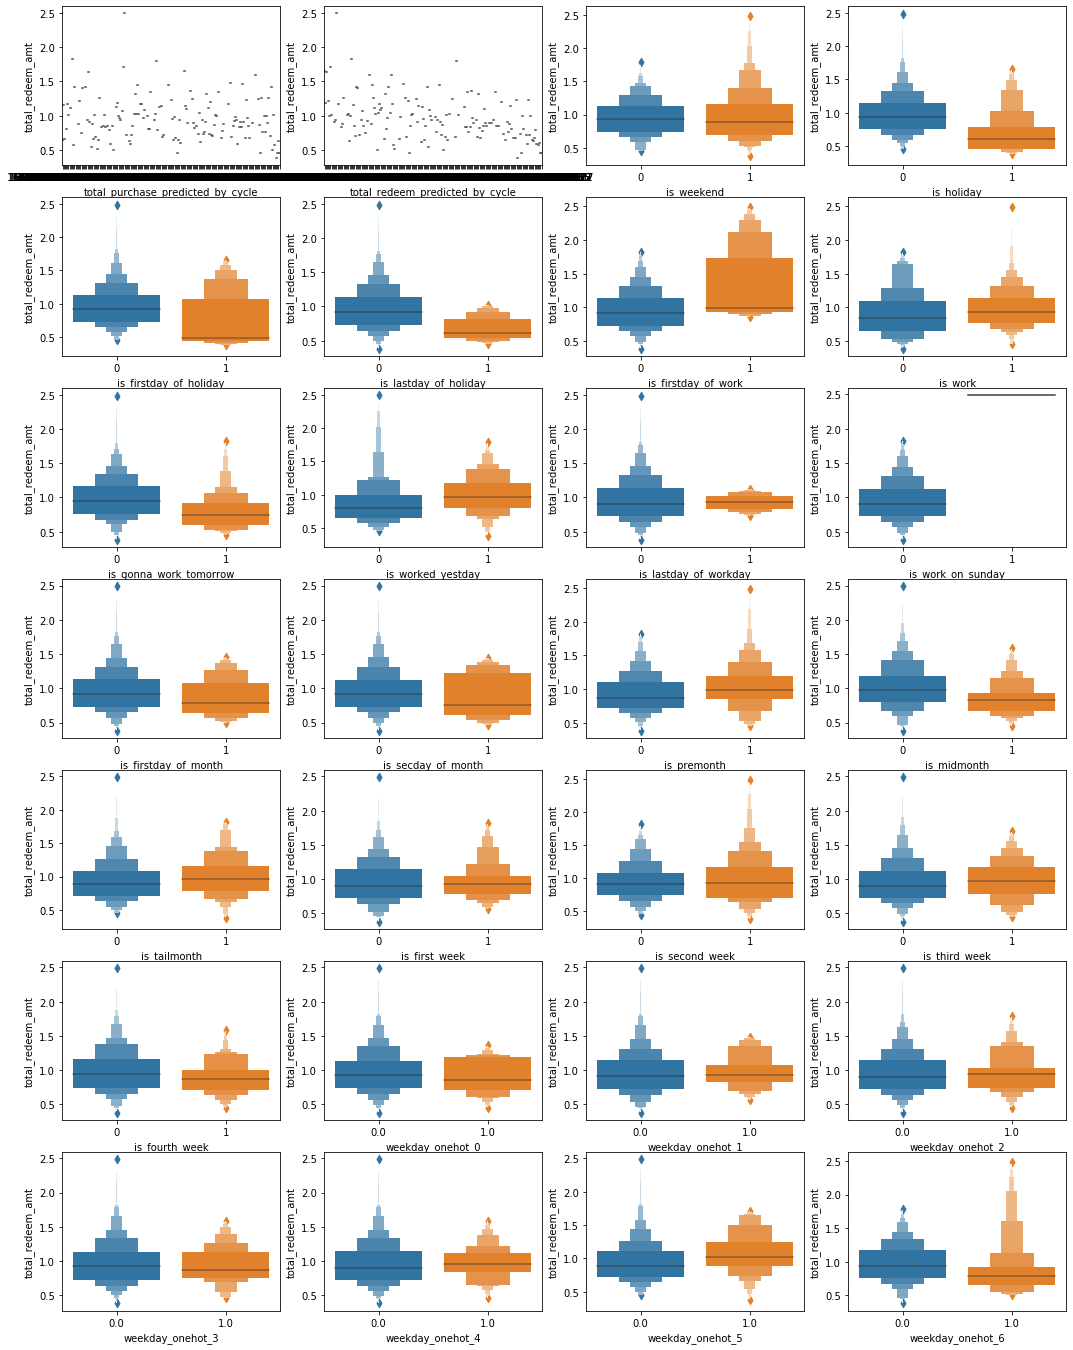

In [14]:
def draw_boxplot(data: pd.DataFrame)->None:
    f, axes = plt.subplots(7, 4, figsize=(18, 24))
    global date_indexs, labels
    count = 0
    for i in [x for x in data.columns if x not in date_indexs + labels + [
        'date']]:
        sns.boxenplot(x=i, y='total_redeem_amt', data=data, 
                      ax=axes[count // 4][count % 4])
        count += 1
draw_boxplot(feature)

In [15]:
purchase_feature_seems_useless = [
      #样本量太少，建模时无效；但若确定这是一个有用规则，可以对结果做修正
      'is_work_on_sunday',
      #中位数差异不明显
      'is_first_week']
redeem_feature_seems_useless = ['is_work_on_sunday', 'is_first_week']

In [16]:
temp = np.abs(feature[[x for x in feature.columns 
                       if x not in ['total_redeem_amt', 'date'] ]
                     ].corr('spearman')['total_purchase_amt'])
purchase_feature_low_correlation = list(set(temp[temp < 0.1].index))

In [17]:
temp1 = np.abs(feature[[x for x in feature.columns 
                       if x not in ['total_purchase_amt', 'date'] ]
                     ].corr('spearman')['total_redeem_amt'])
redeem_feature_low_correlation = list(set(temp1[temp1 < 0.1].index))

In [18]:
total_balance = pfeature.extract_distance_feature(total_balance)

In [24]:
purchase_feature_seems_useless += [
                                  #即使做了处理，但方差太大，不可信，规律不明显
                                  'dis_to_holiday',
                                  #方差太大，不可信
                                  'dis_from_startofmonth',
                                  #方差太大，不可信
                                  'dis_from_middleofmonth']
redeem_feature_seems_useless += [
    'dis_to_holiday', 
    'dis_from_startofmonth', 
    'dis_from_middleofmonth'
]


In [19]:
feature = total_balance[
    [x for x in total_balance.columns if x not in date_indexs]]
dis_feature_indexs = [
    x for x in feature.columns if (
        x not in date_indexs + labels + ['date']) & ('dis' in x)]

In [20]:
def dis_change(x):
    if x > 5:
        x = 10
    return x
dis_holiday_feature = [
    x for x in total_balance.columns if 'dis' in x and 'holi' in x]
dis_month_feature = [
    x for x in total_balance.columns if 'dis' in x and 'month' in x]
total_balance[dis_holiday_feature] = total_balance[
    dis_holiday_feature].applymap(dis_change)
total_balance[dis_month_feature] = total_balance[
    dis_month_feature].applymap(dis_change)

In [21]:
temp = np.abs(feature[[x for x in feature.columns 
                       if ('dis' in x) | (x in ['total_purchase_amt']) 
                      ]].corr()['total_purchase_amt'])
purchase_feature_low_correlation += list(set(temp[temp < 0.1].index) )

In [23]:
temp1 = np.abs(feature[[x for x in feature.columns 
                       if ('dis' in x) | (x in ['total_redeem_amt']) 
                      ]].corr()['total_redeem_amt'])
redeem_feature_low_correlation += list(set(temp[temp < 0.1].index) )

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


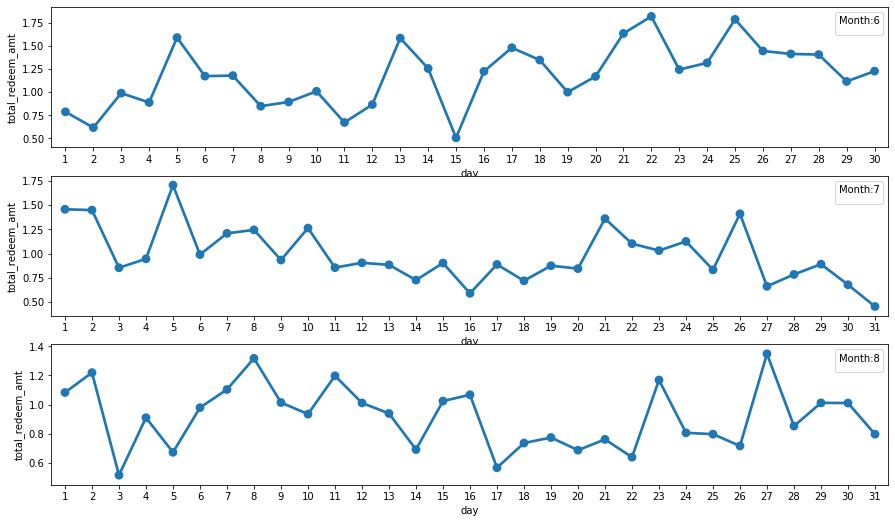

In [68]:
fig = plt.figure(figsize=(15,15))
for i in range(6, 9):
    plt.subplot(5,1,i - 5)
    total_balance_2 = total_balance[
        (total_balance['date'] >= pd.Timestamp(datetime.date(2014,i,1))) & (
            total_balance['date'] < pd.Timestamp(
                datetime.date(2014,i+1,1)))]
    sns.pointplot(x=total_balance_2['day'],
                  y=total_balance_2['total_redeem_amt'])
    plt.legend().set_title('Month:' + str(i))

04-02                          04-05
04-11                          04-13
04-15                          04-22
04-19                          04-22

In [25]:
total_balance = pfeature.extract_peak_feature(total_balance)
feature = total_balance[
    [x for x in total_balance.columns if x not in date_indexs]]
temp = np.abs(feature[
    [x for x in feature.columns if ('peak' in x) or (
        'valley' in x) or (x in ['total_purchase_amt']) ]
].corr()['total_purchase_amt'])
temp

total_purchase_amt          1.000000
dis_from_purchase_peak      0.007173
dis_from_purchase_valley    0.006313
Name: total_purchase_amt, dtype: float64

In [27]:
# 生成周期因子并合并到数据集

weekday_rate_list = []
day_rate_list = []
for i in range(3, 10):
    weekday_rate, day_rate = pfeature.generate_rate(total_balance, i,labels)
    weekday_rate_list.append(weekday_rate.reset_index(drop=True))
    day_rate_list.append(day_rate.reset_index(drop=True))

weekday_rate_list = pd.concat(weekday_rate_list).reset_index(drop=True)
day_rate_list = pd.concat(day_rate_list).reset_index(drop=True)
total_balance = pd.merge(total_balance, weekday_rate_list,
                         on=['weekday','month'], how='left')
total_balance = pd.merge(total_balance, day_rate_list, 
                         on=['day','month'], how='left')

# 对周期因子进行特殊处理

for i in [x for x in total_balance.columns 
          if 'rate' in x and x not in labels + date_indexs]:
    total_balance[i] = total_balance[i].fillna(
        np.nanmedian(total_balance[i]))
    
# 剔除相关性低的特征

feature = total_balance.drop(date_indexs, axis=1)

D:/gitln/WorkCode/BaseFunc\purchase\PurchaseFeatures.py:281: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (pure_balance['date'] >= datetime.date(2014,3,1)
D:/gitln/WorkCode/BaseFunc\purchase\PurchaseFeatures.py:282: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  ) & (pure_balance['date'] < datetime.date(2014, month_index, 1))]


In [28]:
def get_redeemfeature_with_time(data, labels, date_indexs):
    df_tmp_ = data[labels + date_indexs + ['date']].copy()
    total_balance = data.copy()
    
    df_tmp_ = df_tmp_[(df_tmp_['date']>=datetime.date(2014,3,3))]
    df_tmp_['weekday'] = df_tmp_['date'].dt.weekday + 1
    df_tmp_['week'] = df_tmp_['date'].dt.week - min(df_tmp_['date'].dt.week) + 1
    df_tmp_['day'] = df_tmp_['date'].dt.day
    df_tmp_['month'] = df_tmp_['date'].dt.month
    df_tmp_.reset_index(inplace=True)
    del df_tmp_['index']
    df_redeem = pd.DataFrame(columns = ['weekday1','weekday2','weekday3','weekday4',
                                          'weekday5','weekday6','weekday7'])
    count = 0

    for i in range(len(df_tmp_)):
        df_redeem.loc[count,'weekday'+str(df_tmp_.loc[i,'weekday'])] = df_tmp_.loc[i,'total_redeem_amt']
        if df_tmp_.loc[i,'weekday'] == 7:
            count = count + 1

    df_tmp_['redeem_weekday_median'] = np.nan
    df_tmp_['redeem_weekday_mean'] = np.nan
    df_tmp_['redeem_weekday_min'] = np.nan
    df_tmp_['redeem_weekday_max'] = np.nan
    df_tmp_['redeem_weekday_std'] = np.nan
    df_tmp_['redeem_weekday_skew'] = np.nan

    for i in range(len(df_tmp_)):
        #从2014年3月31日开始统计
        if i > 4*7-1:
            df_tmp_.loc[i,'redeem_weekday_median'] = df_redeem.loc[:df_tmp_.loc[i,'week']-2,
                                          'weekday'+str(df_tmp_.loc[i,'weekday'])].median()

            df_tmp_.loc[i,'redeem_weekday_mean'] = df_redeem.loc[:df_tmp_.loc[i,'week']-2,
                                          'weekday'+str(df_tmp_.loc[i,'weekday'])].mean()

            df_tmp_.loc[i,'redeem_weekday_min'] = df_redeem.loc[:df_tmp_.loc[i,'week']-2,
                                          'weekday'+str(df_tmp_.loc[i,'weekday'])].min()    

            df_tmp_.loc[i,'redeem_weekday_max'] = df_redeem.loc[:df_tmp_.loc[i,'week']-2,
                                          'weekday'+str(df_tmp_.loc[i,'weekday'])].max()   

            df_tmp_.loc[i,'redeem_weekday_std'] = df_redeem.loc[:df_tmp_.loc[i,'week']-2,
                                          'weekday'+str(df_tmp_.loc[i,'weekday'])].std() 

            df_tmp_.loc[i,'redeem_weekday_skew'] = df_redeem.loc[:df_tmp_.loc[i,'week']-2,
                                          'weekday'+str(df_tmp_.loc[i,'weekday'])].skew() 

    colList = ['redeem_weekday_median','redeem_weekday_mean','redeem_weekday_min',
               'redeem_weekday_max','redeem_weekday_std','redeem_weekday_skew']
    total_balance = pd.merge(total_balance, df_tmp_[colList+['day','month']], on=['day','month'], how='left')
    return total_balance

In [29]:
total_balance = get_redeemfeature_with_time(total_balance, labels, date_indexs)

d:\softwares\python\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """
d:\softwares\python\lib\site-packages\numpy\lib\nanfunctions.py:1112: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [30]:
total_balance.shape

(228, 60)

In [31]:
purchase_feature_low_correlation

['weekday_onehot_2',
 'weekday_onehot_0',
 'weekday_onehot_6',
 'is_secday_of_month',
 'is_gonna_work_tomorrow',
 'is_third_week',
 'is_lastday_of_workday',
 'weekday_onehot_4',
 'is_midmonth',
 'is_firstday_of_month',
 'is_worked_yestday',
 'weekday_onehot_3',
 'is_second_week',
 'total_redeem_predicted_by_cycle',
 'is_firstday_of_work',
 'is_weekend',
 'dis_to_holiday',
 'dis_from_middleofmonth',
 'dis_from_holiendday',
 'dis_from_middleofweek',
 'dis_from_endofweek',
 'dis_to_holiendday']